In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

## Capacity 1

In [99]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
0,20,1.0,5,126.981127,128.069106,127.652572
1,20,1.0,5,141.668799,141.911550,142.276957
2,20,1.0,5,176.704448,178.197319,176.814337
3,20,1.0,5,169.232127,170.302905,168.517190
4,20,1.0,5,148.602833,150.327215,152.370102


In [100]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['with_obstacle_distance'].mean())
print("Average distance with obstacle avoidance and relocation of dp \t:",df[df['drone_capacity']==1]['distance_after_dp_relocation'].mean())

Average distance with no obstacle 				: 195.92305333482676
Average distance with obstacle avoidance 			: 198.18392907180493
Average distance with obstacle avoidance and relocation of dp 	: 198.44522099859824


In [101]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
54,43,1.0,5,335.131151,343.349105,347.311566
55,40,1.0,5,272.460010,275.652331,276.531567
56,46,1.0,5,329.785339,330.791130,330.355481
57,20,1.0,5,137.514509,137.743737,137.852359
58,33,1.0,5,279.399624,282.217555,279.703375


In [102]:
df_cap_1['rho_obstacle_free'] = df_cap_1['obstacle_free_distance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_obstacle'] = df_cap_1['with_obstacle_distance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_after_dp_relocation'] = df_cap_1['distance_after_dp_relocation']/df_cap_1['obstacle_free_distance']

df_cap_1.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation,rho_obstacle_free,rho_obstacle,rho_after_dp_relocation
0,20,1.0,5,126.981127,128.069106,127.652572,1.0,1.008568,1.005288
1,20,1.0,5,141.668799,141.911550,142.276957,1.0,1.001714,1.004293
2,20,1.0,5,176.704448,178.197319,176.814337,1.0,1.008448,1.000622
3,20,1.0,5,169.232127,170.302905,168.517190,1.0,1.006327,0.995775
4,20,1.0,5,148.602833,150.327215,152.370102,1.0,1.011604,1.025351


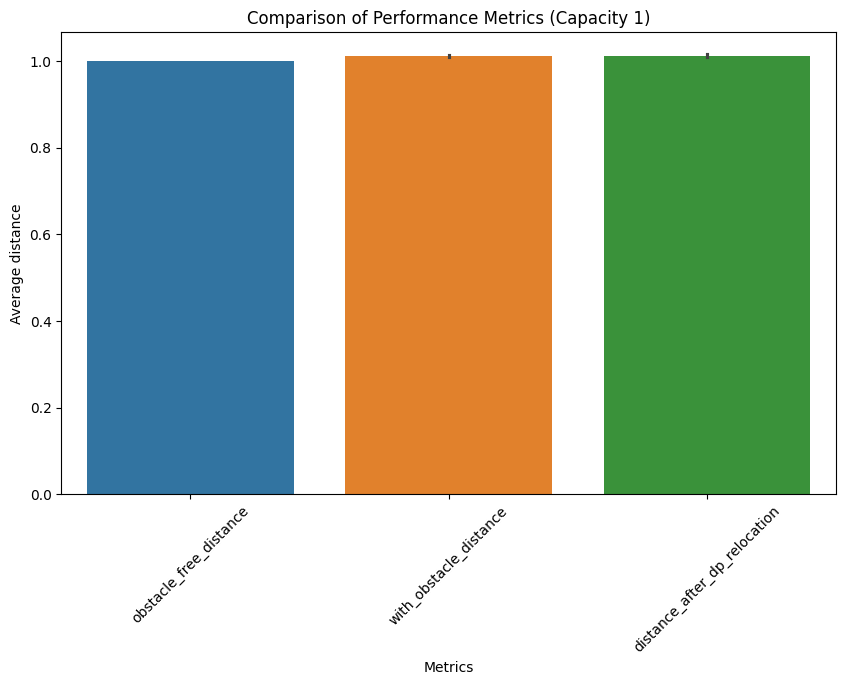

In [103]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_1.iloc[:, -3:])
plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Metrics')
plt.ylabel('Average distance')
plt.xticks(ticks=[0, 1, 2], labels=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


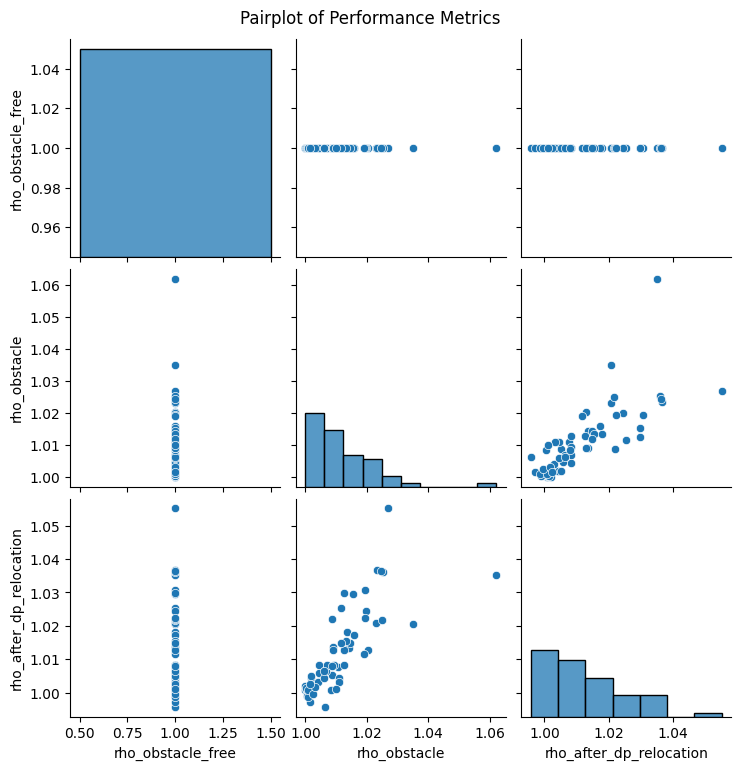

In [104]:
# Pairplot
sns.pairplot(df_cap_1.iloc[:, -3:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

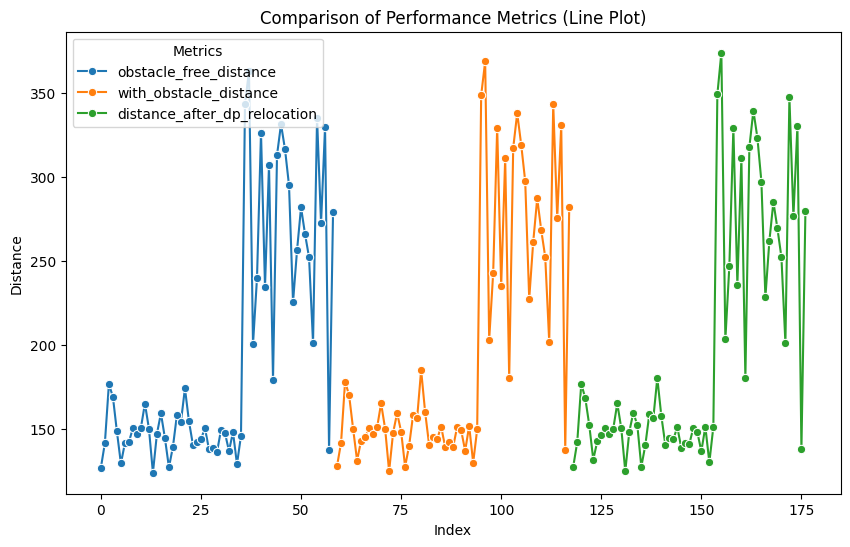

In [105]:
melted_df = df_cap_1.melt(value_vars=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

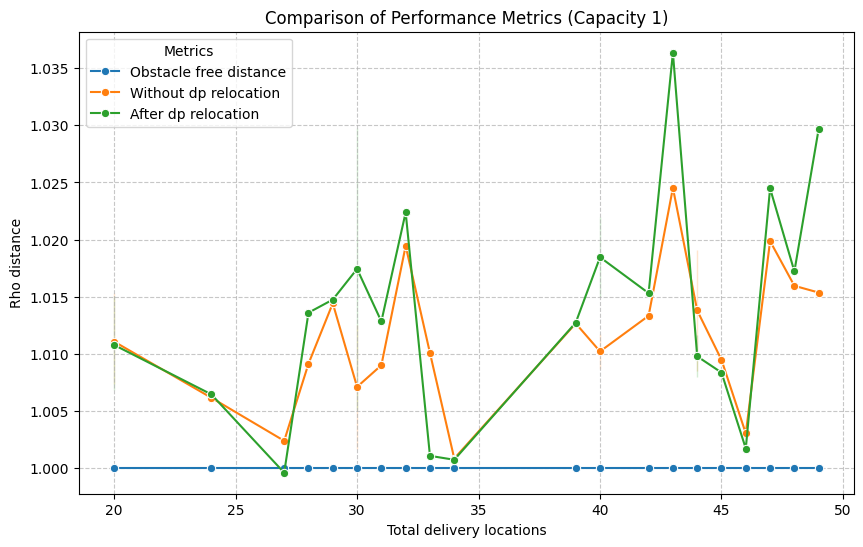

In [106]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_obstacle_free', label='Obstacle free distance', marker='o')
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_obstacle', label='Without dp relocation', marker='o')
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_after_dp_relocation', label='After dp relocation', marker='o')

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Rho distance')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Capacity K

In [107]:
df_cap_k = pd.read_csv('./drone_performance_on_obstacle_capacity_k.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,brut_force_distance,christofides_distance,entry_exit_distance
0,27,5,13,78.632256,81.777095,83.640179,87.647013
1,37,5,13,110.859289,118.620312,121.161165,120.482935
2,18,5,13,64.427906,67.102659,71.931502,76.247597
3,30,5,13,74.966997,80.494112,85.349880,86.404400
4,29,5,13,81.756238,88.234005,90.219120,89.871577


In [108]:
df_cap_k['rho_brut_force'] = df_cap_k['brut_force_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_christofides'] = df_cap_k['christofides_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_entry_exit'] = df_cap_k['entry_exit_distance']/df_cap_k['obstacle_free_distance']

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,brut_force_distance,christofides_distance,entry_exit_distance,rho_brut_force,rho_christofides,rho_entry_exit
0,27,5,13,78.632256,81.777095,83.640179,87.647013,1.039994,1.063688,1.114645
1,37,5,13,110.859289,118.620312,121.161165,120.482935,1.070008,1.092927,1.086810
2,18,5,13,64.427906,67.102659,71.931502,76.247597,1.041515,1.116465,1.183456
3,30,5,13,74.966997,80.494112,85.349880,86.404400,1.073727,1.138499,1.152566
4,29,5,13,81.756238,88.234005,90.219120,89.871577,1.079233,1.103514,1.099263


In [109]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with brut force technique \t\t\t:",df_cap_k['brut_force_distance'].mean())
print("Average distance with christofides technique \t\t\t:",df_cap_k['christofides_distance'].mean())

Average distance with no obstacle 				: 92.77614284578029
Average distance with brut force technique 			: 98.29273631009893
Average distance with christofides technique 			: 101.83734349856263


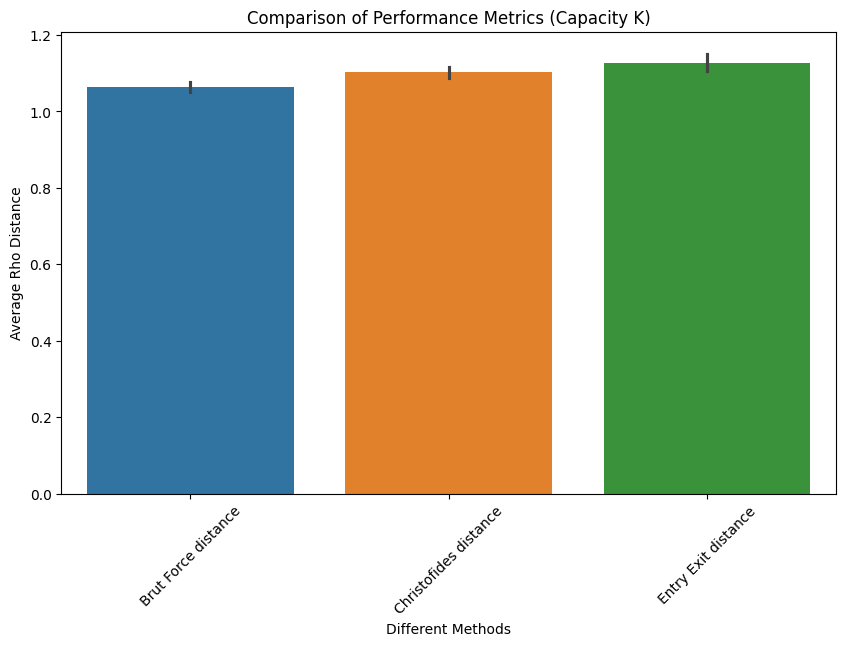

In [110]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_k.iloc[:, -3:], estimator='mean')
plt.title('Comparison of Performance Metrics (Capacity K)')
plt.xlabel('Different Methods')
plt.ylabel('Average Rho Distance')
plt.xticks(ticks=[0,1,2], labels=['Brut Force distance','Christofides distance','Entry Exit distance'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


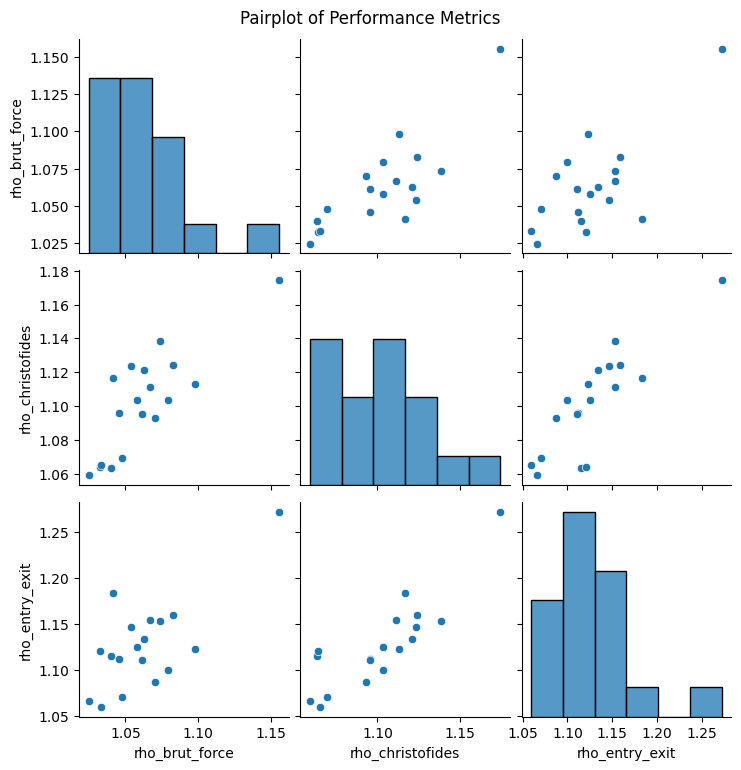

In [111]:
# Pairplot
sns.pairplot(df_cap_k.iloc[:, -3:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

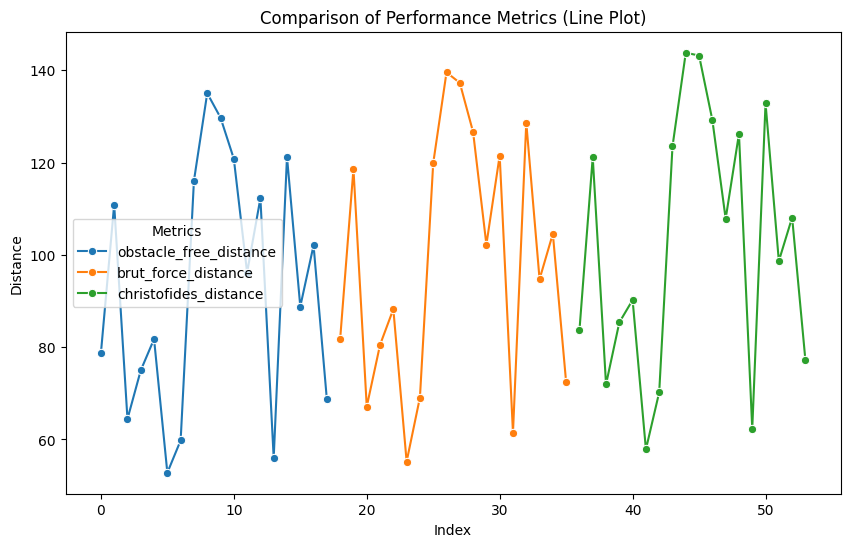

In [112]:
melted_df = df_cap_k.melt(value_vars=['obstacle_free_distance', 'brut_force_distance', 'christofides_distance'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

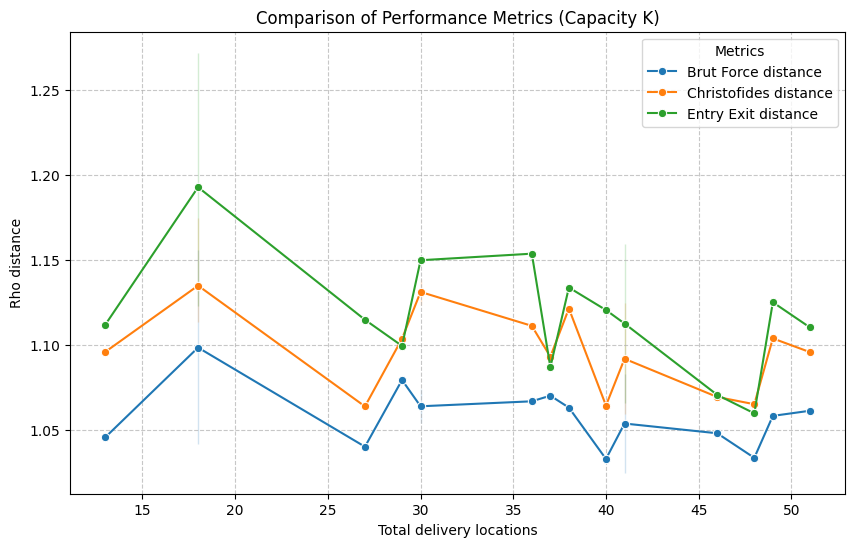

In [113]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_brut_force', label='Brut Force distance', marker='o')
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_christofides', label='Christofides distance', marker='o')
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_entry_exit', label='Entry Exit distance', marker='o')

plt.title('Comparison of Performance Metrics (Capacity K)')
plt.xlabel('Total delivery locations')
plt.ylabel('Rho distance')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()